### PCA

In [4]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import scale
import scipy
import matplotlib.pyplot as plt

# Load Iris data
data = load_iris()
x = data['data']
y = data['target']

# Since PCA is an unsupervised method,
# we will not be using the target variable y

# scale the data such that mean = 0 and standard deviation = 1
x_s = scale(x,with_mean=True,with_std=True,axis=0)

# Calculate correlation matrix
x_c = np.corrcoef(x_s.T)

# Find eigen value and eigen vector from correlation matrix
eig_val,r_eig_vec = scipy.linalg.eig(x_c)
print( 'Eigen values \n%s' %(eig_val))
print( '\n Eigen vectors \n%s' %(r_eig_vec))

# Select the first two eigen vectors.
w = r_eig_vec[:,0:2]

# # Project the dataset in to the dimension
# from 4 dimension to 2 using the right eignen vector
x_rd = x_s.dot(w)

# Scatter plot the new two dimensions
plt.figure(1)
plt.scatter(x_rd[:,0],x_rd[:,1],c=y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")

Eigen values 
[2.91081808+0.j 0.92122093+0.j 0.14735328+0.j 0.02060771+0.j]

 Eigen vectors 
[[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]


Text(0, 0.5, 'Component 2')

In [11]:
print("Component, Eigen Value, % of Variance, Cummulative %")
cum_per = 0
per_var = 0

for i,e_val in enumerate(eig_val):
    per_var = round((e_val / len(eig_val)),3)
    cum_per+=per_var
    print('%d, %0.2f, %0.2f, %0.2f' %(i+1, e_val, per_var*100,cum_per*100))

Component, Eigen Value, % of Variance, Cummulative %
1, 2.91, 72.80, 72.80
2, 0.92, 23.00, 95.80
3, 0.15, 3.70, 99.50
4, 0.02, 0.50, 100.00


/home/mayuri/.local/lib/python3.6/site-packages/ipykernel_launcher.py:8: ComplexWarning: Casting complex values to real discards the imaginary part
  


### Kernal PCA

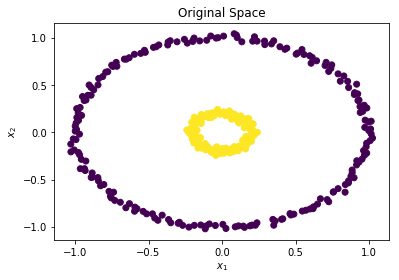

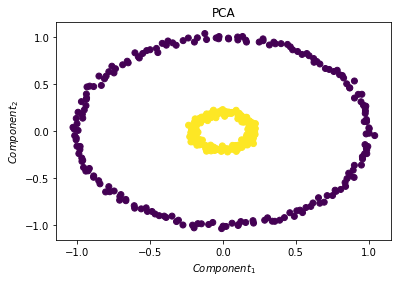

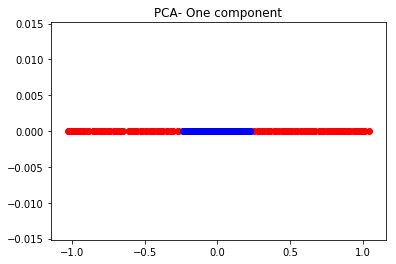

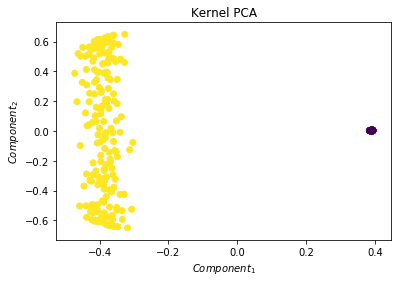

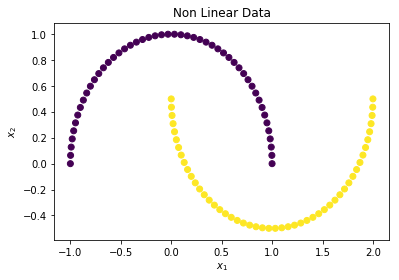

In [16]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

# Generate a dataset where the variations cannot be captured by astraight line
np.random.seed(0)
x,y = make_circles(n_samples=400, factor=.2,noise=0.02)

# Plot the generated dataset
plt.close('all')
plt.figure(1)
plt.title("Original Space")

plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Try to fit the data using normal PCA
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)

plt.figure(2)
plt.title("PCA")
plt.scatter(x_pca[:,0],x_pca[:,1],c=y)
plt.xlabel("$Component_1$")
plt.ylabel("$Component_2$")

# Plot using the first component from normal pca
class_1_indx = np.where(y==0)[0]
class_2_indx = np.where(y==1)[0]
plt.figure(3)
plt.title("PCA- One component")
plt.scatter(x_pca[class_1_indx,0],np.zeros(len(class_1_indx)),color='red')
plt.scatter(x_pca[class_2_indx,0],np.zeros(len(class_2_indx)),color='blue')

# Create KernelPCA object in Scikit learn, specifying a type of kernel as a parameter.
kpca = KernelPCA(kernel="rbf",gamma=10)

# Perform KernelPCA
kpca.fit(x)
x_kpca = kpca.transform(x)

# Plot the first two components.
plt.figure(4)
plt.title("Kernel PCA")
plt.scatter(x_kpca[:,0],x_kpca[:,1],c=y)
plt.xlabel("$Component_1$")
plt.ylabel("$Component_2$")
plt.show()

from sklearn.datasets import make_moons
x,y = make_moons(100)
plt.figure(5)
plt.title("Non Linear Data")
plt.scatter(x[:,0],x[:,1],c=y)
plt.xlabel("$x_1$")

plt.ylabel("$x_2$")
plt.savefig('fig-7.png')
plt.show()

### SVD

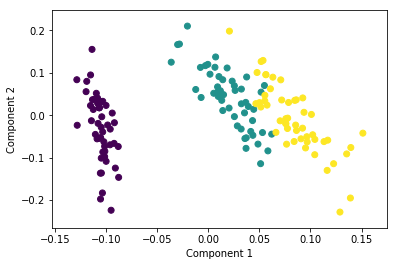

In [17]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import scale
from scipy.linalg import svd

# Load Iris dataset
data = load_iris()
x = data['data']
y = data['target']

# Proceed by scaling the x variable w.r.t its mean,
x_s = scale(x,with_mean=True,with_std=False,axis=0)

# Decompose the matrix using SVD technique.We will use SVD implementation in scipy.
U,S,V = svd(x_s,full_matrices=False
           )
# Approximate the original matrix by selecting only the first twosingular values.
x_t = U[:,:2]

# Finally we plot the datasets with the reduced components.
plt.figure(1)
plt.scatter(x_t[:,0],x_t[:,1],c=y)
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

### Random Projection

(595, 16115)
(595, 1000)


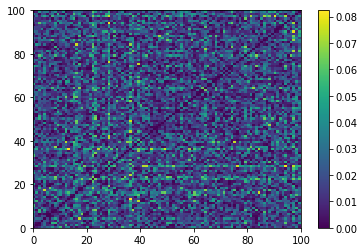

In [19]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import euclidean_distances
from sklearn.random_projection import GaussianRandomProjection
import matplotlib.pyplot as plt
import numpy as np

# Load 20 newsgroup dataset
# We select only sci.crypt category
# Other categories include
# 'sci.med', 'sci.space' ,'soc.religion.christian'
cat =['sci.crypt']
data = fetch_20newsgroups(categories=cat)

# Create a term document matrix, with term frequencies as the values
# from the above dataset.
vectorizer = TfidfVectorizer(use_idf=False)
vector = vectorizer.fit_transform(data.data)

# Perform the projection. In this case we reduce the dimension to 1000
gauss_proj = GaussianRandomProjection(n_components=1000)
gauss_proj.fit(vector)

# Transform the original data to the new space
vector_t = gauss_proj.transform(vector)

# print transformed vector shape
print (vector.shape)
print (vector_t.shape)

# To validate if the transformation has preserved the distance, we
# calculate the old and the new distance between the points
org_dist = euclidean_distances(vector)
red_dist = euclidean_distances(vector_t)
diff_dist = abs(org_dist - red_dist)

# We take the difference between these points and plot them
# as a heatmap (only the first 100 documents).
plt.figure()
plt.pcolor(diff_dist[0:100,0:100])
plt.colorbar()
plt.show()

### Non-negative Matrix Factorization

[[2.1 0. ]
 [1.9 0. ]
 [0.8 2. ]
 [1.9 0.4]
 [0.3 2.3]
 [1.4 1.3]
 [1.  2. ]
 [2.  0.4]
 [0.8 1.8]
 [1.7 0.6]]
User id = 1, comp1 score = 2.13, comp 2 score = 0.00
User id = 2, comp1 score = 1.91, comp 2 score = 0.00
User id = 3, comp1 score = 0.76, comp 2 score = 2.05
User id = 4, comp1 score = 1.94, comp 2 score = 0.44
User id = 5, comp1 score = 0.29, comp 2 score = 2.35
User id = 6, comp1 score = 1.39, comp 2 score = 1.30
User id = 7, comp1 score = 0.99, comp 2 score = 2.02
User id = 8, comp1 score = 2.01, comp 2 score = 0.41
User id = 9, comp1 score = 0.80, comp 2 score = 1.78
User id = 10, comp1 score = 1.74, comp 2 score = 0.58
[[2.2 2.3 2.2 2.1 2.3 0.6 1.1 1.1 0.7 0. ]
 [0.3 0.3 0.  0.8 0.3 1.8 1.7 1.4 1.8 2. ]]


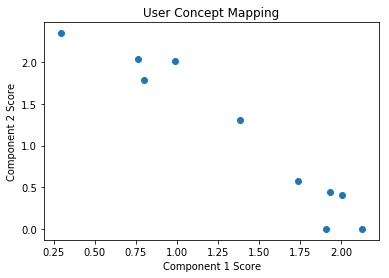

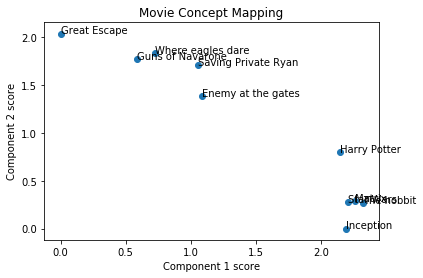

[[4.7 4.8 4.7 4.6 4.9 1.3 2.2 2.3 1.5 0. ]
 [4.2 4.3 4.2 4.1 4.4 1.1 2.  2.1 1.4 0. ]
 [2.2 2.3 1.7 3.3 2.3 4.1 4.3 3.7 4.3 4.2]
 [4.4 4.5 4.2 4.5 4.6 1.9 2.8 2.7 2.2 0.9]
 [1.3 1.3 0.6 2.5 1.3 4.3 4.3 3.6 4.5 4.8]
 [3.4 3.5 3.  4.  3.6 3.1 3.7 3.3 3.4 2.7]
 [2.7 2.8 2.2 3.7 2.8 4.1 4.5 3.9 4.4 4.1]
 [4.6 4.7 4.4 4.6 4.8 1.9 2.8 2.8 2.2 0.8]
 [2.2 2.3 1.7 3.1 2.3 3.6 3.9 3.3 3.9 3.6]
 [4.  4.1 3.8 4.2 4.2 2.  2.8 2.7 2.3 1.2]]


In [27]:
import numpy as np
from collections import defaultdict
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

# load our ratings matrix in python.
ratings = [
[5.0, 5.0, 4.5, 4.5, 5.0, 3.0, 2.0, 2.0, 0.0, 0.0],
[4.2, 4.7, 5.0, 3.7, 3.5, 0.0, 2.7, 2.0, 1.9, 0.0],
[2.5, 0.0, 3.3, 3.4, 2.2, 4.6, 4.0, 4.7, 4.2, 3.6],
[3.8, 4.1, 4.6, 4.5, 4.7, 2.2, 3.5, 3.0, 2.2, 0.0],
[2.1, 2.6, 0.0, 2.1, 0.0, 3.8, 4.8, 4.1, 4.3, 4.7],
[4.7, 4.5, 0.0, 4.4, 4.1, 3.5, 3.1, 3.4, 3.1, 2.5],
[2.8, 2.4, 2.1, 3.3, 3.4, 3.8, 4.4, 4.9, 4.0, 4.3],
[4.5, 4.7, 4.7, 4.5, 4.9, 0.0, 2.9, 2.9, 2.5, 2.1],
[0.0, 3.3, 2.9, 3.6, 3.1, 4.0, 4.2, 0.0, 4.5, 4.6],
[4.1, 3.6, 3.7, 4.6, 4.0, 2.6, 1.9, 3.0, 3.6, 0.0]
]

movie_dict = {
1:"Star Wars",
2:"Matrix",
3:"Inception",
4:"Harry Potter",
5:"The hobbit",
6:"Guns of Navarone",
7:"Saving Private Ryan",
8:"Enemy at the gates",
9:"Where eagles dare",
10:"Great Escape"
}

A = np.asmatrix(ratings,dtype=float)

# perform non negative matrix transformation on the data.
max_components = 2
reconstruction_error = []
nmf = None
nmf = NMF(n_components = max_components,random_state=1)
A_dash = nmf.fit_transform(A)

print(A_dash)
# Examine the reduced matrixfor i in range(A_dash.shape[0]):
for i in range(A_dash.shape[0]):
    print ("User id = %d, comp1 score = %0.2f, comp 2 score = %0.2f"%(i+1,A_dash[i][0],A_dash[i][1]))

plt.figure(1)
plt.title("User Concept Mapping")
x = A_dash[:,0]
y = A_dash[:,1]
plt.scatter(x,y)
plt.xlabel("Component 1 Score")
plt.ylabel("Component 2 Score")

# Let us examine our component matrix F.
F = nmf.components_
print(F)
plt.figure(2)
plt.title("Movie Concept Mapping")
x = F[0,:]
y = F[1,:]
plt.scatter(x,y)
plt.xlabel("Component 1 score")
plt.ylabel("Component 2 score")
for i in range(F[0,:].shape[0]):
    plt.annotate(movie_dict[i+1],(F[0,:][i],F[1,:][i]))
plt.show()

reconstructed_A = np.dot(A_dash, F)
np.set_printoptions(precision=1)
print (reconstructed_A)